# Data Fundamentals Project 06 Custom EDA

### Kelly Bromley
### 06-07-2024

#### The purpose of this project is to perform a custom EDA of a chosen data set. For this project I have chosen to use the mpg.csv data from Seaborn.

## Importing Dependencies

In [46]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## Loading mpg data set from Seaborn

In [47]:
# Load the Iris dataset into DataFrame
df = sns.load_dataset('mpg')

#### I selected the mpg data set from Seaborn library because I like cars and it seemed to be worthwhile adventure in analyzing it.

## Splitting Name Column to create 'Make' Column

In [48]:
df['Make'] = df['name'].str.split(' ').str[0]

#### I noticed the names of the cars in the name column began with the car manufacturers name so I wanted to split this into a new column to see if there was a difference between different manufacturers of cars.

## Renaming Columns

### This is done to make viewing easier and to add context to the columns.

In [49]:
# Renaming a column
df.rename(columns={'mpg': 'MPG'}, inplace=True)
df.rename(columns={'cylinders': 'Engine Cylinders'}, inplace=True)
df.rename(columns={'displacement': 'Displacement (Cubic Inch)'}, inplace=True)
df.rename(columns={'horsepower': 'HP'}, inplace=True)
df.rename(columns={'weight': 'Weight (lbs)'}, inplace=True)
df.rename(columns={'acceleration': 'Acceleration'}, inplace=True)
df.rename(columns={'model_year': 'Year'}, inplace=True)
df.rename(columns={'origin': 'Country of Origin'}, inplace=True)
df.rename(columns={'name': 'Car Name'}, inplace=True)

## Initial view of the Data in the Data Frame

In [50]:
print(df.head())

    MPG  Engine Cylinders  Displacement (Cubic Inch)     HP  Weight (lbs)  \
0  18.0                 8                      307.0  130.0          3504   
1  15.0                 8                      350.0  165.0          3693   
2  18.0                 8                      318.0  150.0          3436   
3  16.0                 8                      304.0  150.0          3433   
4  17.0                 8                      302.0  140.0          3449   

   Acceleration  Year Country of Origin                   Car Name       Make  
0          12.0    70               usa  chevrolet chevelle malibu  chevrolet  
1          11.5    70               usa          buick skylark 320      buick  
2          11.0    70               usa         plymouth satellite   plymouth  
3          12.0    70               usa              amc rebel sst        amc  
4          10.5    70               usa                ford torino       ford  


In [51]:
print(df.head(10))
print(df.shape)
print(df.dtypes)

    MPG  Engine Cylinders  Displacement (Cubic Inch)     HP  Weight (lbs)  \
0  18.0                 8                      307.0  130.0          3504   
1  15.0                 8                      350.0  165.0          3693   
2  18.0                 8                      318.0  150.0          3436   
3  16.0                 8                      304.0  150.0          3433   
4  17.0                 8                      302.0  140.0          3449   
5  15.0                 8                      429.0  198.0          4341   
6  14.0                 8                      454.0  220.0          4354   
7  14.0                 8                      440.0  215.0          4312   
8  14.0                 8                      455.0  225.0          4425   
9  15.0                 8                      390.0  190.0          3850   

   Acceleration  Year Country of Origin                   Car Name       Make  
0          12.0    70               usa  chevrolet chevelle malibu  chev

In [52]:
print(df.describe())

              MPG  Engine Cylinders  Displacement (Cubic Inch)          HP  \
count  398.000000        398.000000                 398.000000  392.000000   
mean    23.514573          5.454774                 193.425879  104.469388   
std      7.815984          1.701004                 104.269838   38.491160   
min      9.000000          3.000000                  68.000000   46.000000   
25%     17.500000          4.000000                 104.250000   75.000000   
50%     23.000000          4.000000                 148.500000   93.500000   
75%     29.000000          8.000000                 262.000000  126.000000   
max     46.600000          8.000000                 455.000000  230.000000   

       Weight (lbs)  Acceleration        Year  
count    398.000000    398.000000  398.000000  
mean    2970.424623     15.568090   76.010050  
std      846.841774      2.757689    3.697627  
min     1613.000000      8.000000   70.000000  
25%     2223.750000     13.825000   73.000000  
50%     2

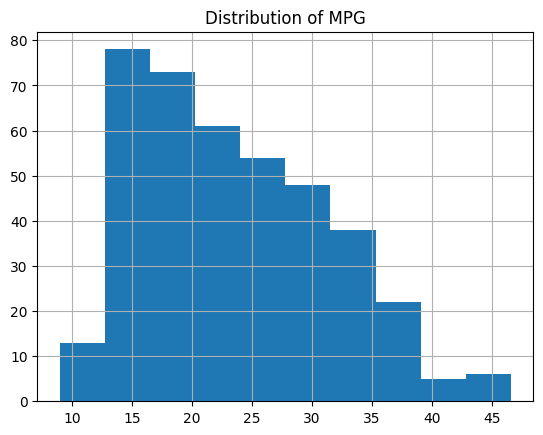

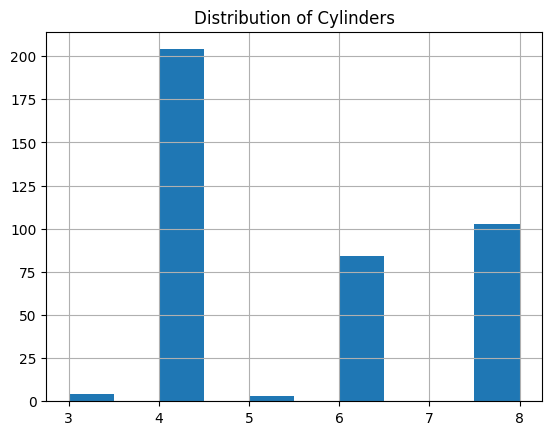

In [53]:
# Inspect histogram by numerical column
df['MPG'].hist()
plt.title(f'Distribution of MPG')
plt.show()


df['Engine Cylinders'].hist()
plt.title(f'Distribution of Cylinders')
plt.show()


#### The distribution of miles per gallon for cars is somewhat below what you would typically see in the current car market. Most modern vehicles would would average at least 20mpg or better, however, there is still a low number of vehicles getting over 35mpg. If added into the data set it would be interesting to see the difference between gas and diesel engines as diesel should yield a higher mpg.

#### The distribution of the engine cylinders is typical of what you would see in the current car market. Most vehicles have either 4, 6, or 8 cylinders but a few car manufacturers did make 3 cylinder and 5 cylinder engines.


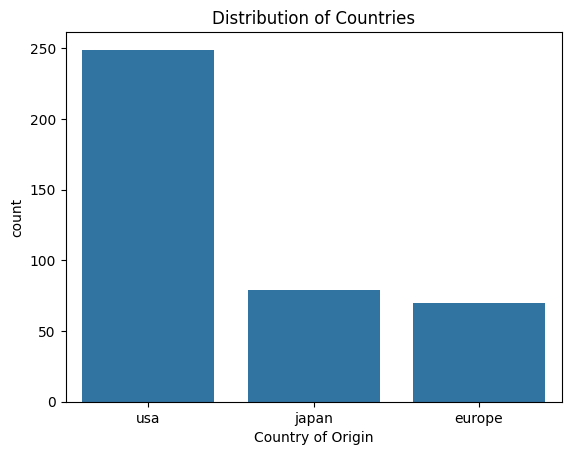

In [54]:
# Inspect value counts by categorical column
df['Country of Origin'].value_counts()

# Inspect value counts for all categorical columns
sns.countplot(x='Country of Origin', data=df)
plt.title(f'Distribution of Countries')
plt.show()


#### As seen by the distribution above, a majority of cars on the list are made within the US. Given the average year these cars were manufactured was in 1976 this would be a typical representation of the American car market. Today the car market in the US would most likely contain more foreign manufacturers.

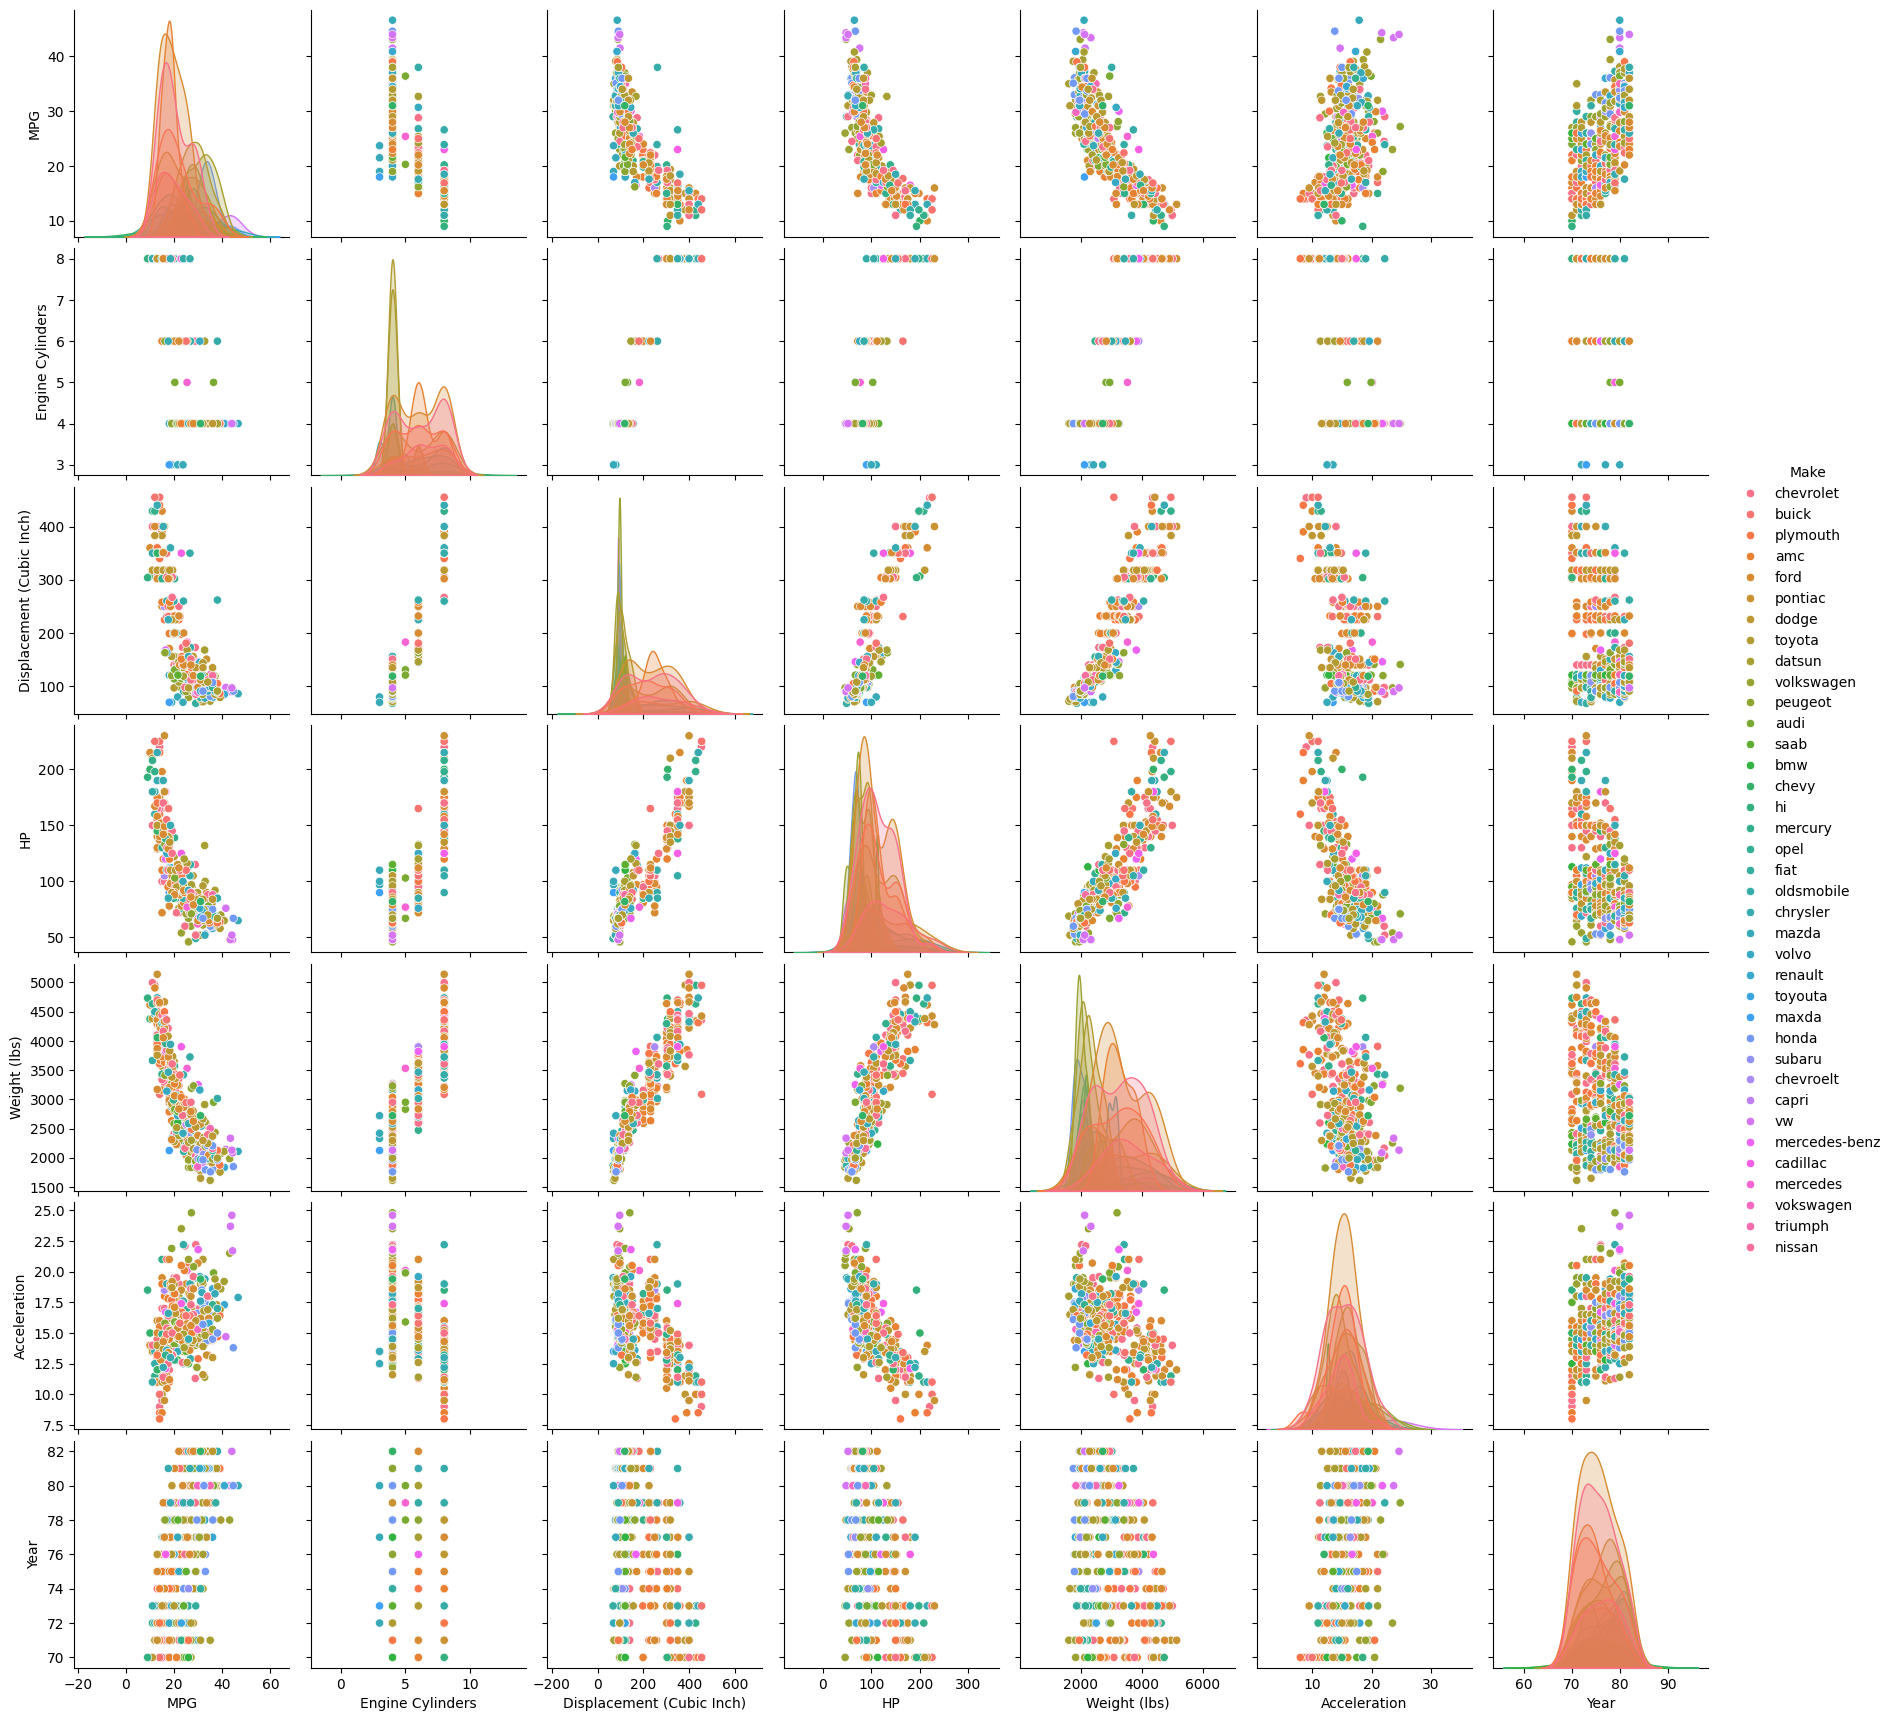

In [55]:
sns.pairplot(df, hue='Make')
plt.show()

#### Some notable items in the graphs are the Engine Cylinders with MPG and Weight with MPG
##### The Engine Cylinders with MPG chart shows us the more cylinders a car has the lower the expected fuel economy is. There are some advantages of having an engine with a higher number of cylinders such as towing and payload capacity, which aren't reflected in this data. If a decision was to be made solely on fuel economy it would be more likely to find a car with 4 cylinders and a higher MPG.

##### The Weight with MPG shows us the heavier a vehicle is the fuel economy will worsen. Often times the materials used along with the displacement of the engine can influence the overall weight of the car. Cars are much lighter today as we've deployed the use of fiberglass, plastics, and aluminum in building modern cars.

##### Both the Engine Cylinder count and overall weight of the vehicle would be good indicators of what MPG to expect from the vehicle.

## Which Country makes heavy vehicles the most?

<Axes: xlabel='Country of Origin', ylabel='Weight (lbs)'>

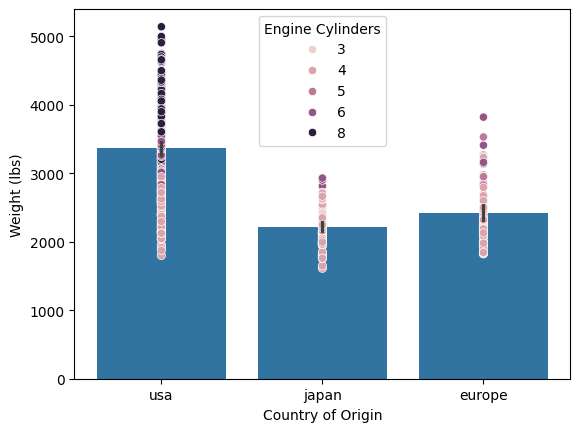

In [56]:
sns.barplot(x='Country of Origin', y='Weight (lbs)', data=df)

sns.scatterplot(x='Country of Origin', y='Weight (lbs)', hue='Engine Cylinders', data=df)

#### The USA appears to be the country with the highest average weight per car, the heaviest car weighing in at over 5000lbs, and the most cars with 8 cylinders.